### Predicting subjective score (regression) Josh Selig

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from seaborn import regplot

In [2]:
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')
df_train.head()

,Species,Country.of.Origin,Number.of.Bags,In.Country.Partner,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,...,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_low_meters,altitude_high_meters,quality
0,Arabica,"Tanzania, United Republic Of",300,Tanzanian Coffee Board,Arusha,Washed / Wet,7.67,7.50,7.33,7.25,...,7.75,82.83,0.11,0,0.0,Green,5,1400.0,1400.0,excellent
1,Arabica,Brazil,25,NUCOFFEE,Mundo Novo,Semi-washed / Semi-pulped,7.75,7.50,7.58,7.50,...,7.58,83.17,0.12,0,0.0,Blue-Green,3,1000.0,1000.0,excellent
2,Arabica,"Tanzania, United Republic Of",1,Africa Fine Coffee Association,Other,Washed / Wet,7.42,7.50,7.50,7.33,...,7.50,82.08,0.12,0,0.0,Green,3,1500.0,1700.0,excellent
3,Arabica,Costa Rica,250,Specialty Coffee Association of Costa Rica,Caturra,Washed / Wet,7.92,7.83,7.83,7.83,...,7.92,84.50,0.11,0,0.0,Green,0,1700.0,1700.0,excellent
4,Arabica,Colombia,100,Almacafé,Caturra,Washed / Wet,7.67,7.33,7.33,7.33,...,7.58,82.25,0.11,0,0.0,Green,0,1600.0,1950.0,excellent


In [3]:

df_train = df_train.drop(['In.Country.Partner', 'Country.of.Origin','Variety'], axis =1)
df_test = df_test.drop(['In.Country.Partner', 'Country.of.Origin','Variety'], axis =1)

In [4]:
X_train = df_train.drop(['Cupper.Points','quality','Total.Cup.Points'],axis = 1)
X_test = df_test.drop(['Cupper.Points','quality','Total.Cup.Points'],axis = 1)

y_train = df_train['Cupper.Points']
y_test = df_test['Cupper.Points']

In [5]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

### Decision Tree Regressor

In [6]:
grid = {'max_depth': np.arange(1, 30)}

tree = DecisionTreeRegressor()
treeCV = GridSearchCV(tree, param_grid=grid, return_train_score=True)
treeCV.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             return_train_score=True)

In [7]:
#Best parameters
treeCV.best_params_
# Depending on each time you run, it comes up with a different best param. Lowest height thats good is 4

{'max_depth': 7}

In [8]:
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X_train, y_train)
tree.score(X_test, y_test).round(3)
#Score of 63% for predictiing the subjective score

0.631

<AxesSubplot:>

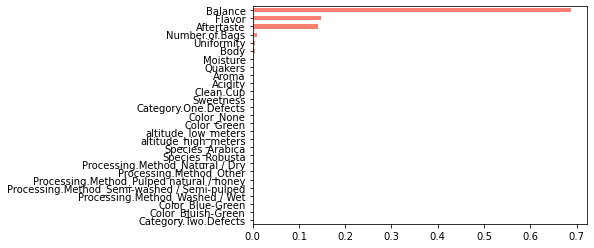

In [9]:
feature_importance = pd.Series(tree.feature_importances_,index= X_train.columns)
feature_importance.sort_values().plot.barh(color='salmon')

### Random Forest Regressor

In [10]:
grid = {'n_estimators': np.arange(100, 200, 20), 'max_depth': np.arange(1, 20)}

rf = RandomForestRegressor()
rfCV = GridSearchCV(rf, param_grid=grid, return_train_score=True, n_jobs=-1)
rfCV.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': array([100, 120, 140, 160, 180])},
             return_train_score=True)

In [11]:
rfCV.best_params_

{'max_depth': 14, 'n_estimators': 120}

In [12]:
best_forest = rfCV.best_estimator_
best_forest.score(X_train, y_train)

0.9788133504559484

In [13]:
best_forest.score(X_test, y_test)

0.6639265590216735

<AxesSubplot:>

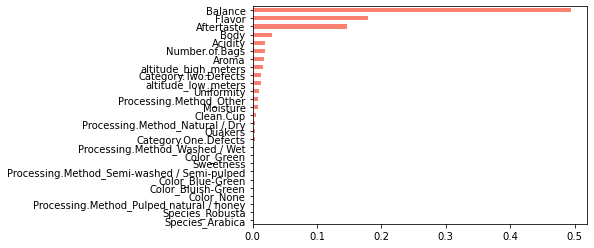

In [35]:
feature_importance = pd.Series(best_forest.feature_importances_,index= X_train.columns)
feature_importance.sort_values().plot.barh(color='salmon')

(array([  8.,   9.,  17.,  20.,  41.,  76., 136.,  24., 170.,  78., 154.,
        136., 127., 113.,  63.,  51.,  12.,   4.,   2.,   3.]),
 array([5.97149319, 6.09905186, 6.22661054, 6.35416921, 6.48172788,
        6.60928656, 6.73684523, 6.86440391, 6.99196258, 7.11952125,
        7.24707993, 7.3746386 , 7.50219728, 7.62975595, 7.75731462,
        7.8848733 , 8.01243197, 8.13999064, 8.26754932, 8.39510799,
        8.52266667]),
 <BarContainer object of 20 artists>)

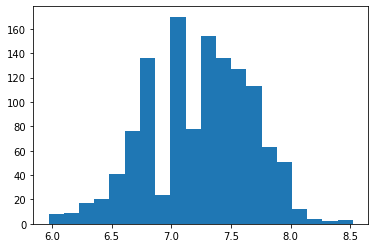

In [36]:
y_train_predict = best_forest.predict(X_train)
y_train_predict = y_train_predict.reshape(-1,1)
plt.hist(y_train_predict, bins = 20)

(array([  2.,   1.,   0.,   0.,   6.,   9.,  16.,  39.,  99., 136., 156.,
        110., 172., 164., 150.,  91.,  66.,  16.,   3.,   8.]),
 array([5.17  , 5.3405, 5.511 , 5.6815, 5.852 , 6.0225, 6.193 , 6.3635,
        6.534 , 6.7045, 6.875 , 7.0455, 7.216 , 7.3865, 7.557 , 7.7275,
        7.898 , 8.0685, 8.239 , 8.4095, 8.58  ]),
 <BarContainer object of 20 artists>)

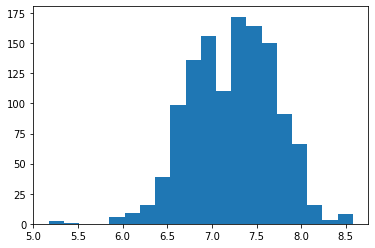

In [37]:
plt.hist(y_train, bins = 20)

(array([ 2.,  0.,  2.,  0.,  0.,  3.,  9.,  6., 18., 18., 28., 44., 25.,
        12.,  4.,  8.,  0.,  2.,  0.,  1.]),
 array([6.27283333, 6.38221667, 6.4916    , 6.60098333, 6.71036667,
        6.81975   , 6.92913333, 7.03851667, 7.1479    , 7.25728333,
        7.36666667, 7.47605   , 7.58543333, 7.69481667, 7.8042    ,
        7.91358333, 8.02296667, 8.13235   , 8.24173333, 8.35111667,
        8.4605    ]),
 <BarContainer object of 20 artists>)

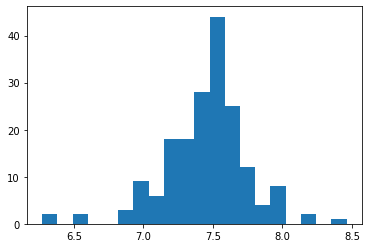

In [38]:
y_test_predict = best_forest.predict(X_test).reshape(-1,1)
plt.hist(y_test_predict, bins = 20)

(array([ 1.,  1.,  1.,  2.,  3.,  7., 16., 10., 11., 18., 42., 23., 12.,
        18.,  4.,  5.,  4.,  0.,  1.,  3.]),
 array([6.33  , 6.4385, 6.547 , 6.6555, 6.764 , 6.8725, 6.981 , 7.0895,
        7.198 , 7.3065, 7.415 , 7.5235, 7.632 , 7.7405, 7.849 , 7.9575,
        8.066 , 8.1745, 8.283 , 8.3915, 8.5   ]),
 <BarContainer object of 20 artists>)

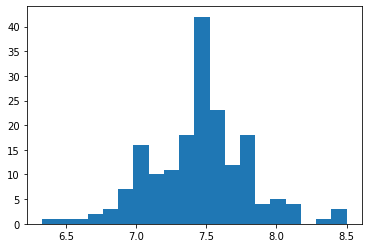

In [39]:
plt.hist(y_test, bins = 20)

<AxesSubplot:xlabel='Cupper.Points'>

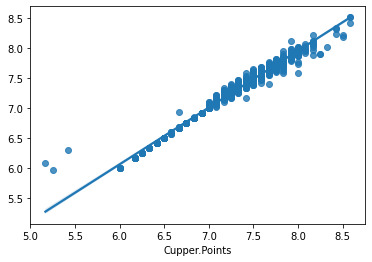

In [41]:
regplot(x=y_train, y=y_train_predict)

<AxesSubplot:xlabel='Cupper.Points'>

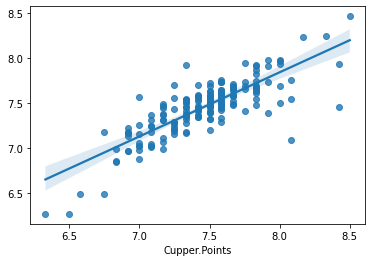

In [43]:
regplot(x=y_test ,y = y_test_predict)